# Import necessary libraries

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
!pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


# Mount Google Drive to access files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open ('/content/drive/MyDrive/Telco-Customer-Churn - Cleaned.csv') as file:
  df = pd.read_csv(file,sep=',')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#####Backing up data for future work





In [ ]:
# Correct way: Create a deep copy using .copy()
df_deep_copy = df.copy()

# Feature Engineering

### Convert binary categorical features to numerical values

In [ ]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in binary_features:
    df[feature] = df[feature].apply(lambda x: 1 if x in ['Male', 'Yes'] else 0)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### One-Hot Encoding for categorical variables

In [ ]:
# One-Hot Encode categorical variables


categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


#### Create interaction feature

In [ ]:
df['MonthlyCharges_Tenure'] = df['MonthlyCharges'] * df['tenure']

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_Tenure
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,True,False,False,False,False,True,False,29.85
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,False,False,False,True,1936.30
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,True,False,False,False,False,False,True,107.70
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,True,False,True,False,False,False,1903.50
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,True,False,False,False,False,True,False,141.40


#### Feature Scaling for tenure, MonthlyCharges, and TotalCharges

In [ ]:
scaler = MinMaxScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_Tenure
0,7590-VHVEG,0,0,1,0,0.013889,0,1,0.115423,0.001275,...,False,False,True,False,False,False,False,True,False,29.85
1,5575-GNVDE,1,0,0,0,0.472222,1,0,0.385075,0.215867,...,False,False,False,True,False,False,False,False,True,1936.30
2,3668-QPYBK,1,0,0,0,0.027778,1,1,0.354229,0.010310,...,False,False,True,False,False,False,False,False,True,107.70
3,7795-CFOCW,1,0,0,0,0.625000,0,0,0.239303,0.210241,...,False,False,False,True,False,True,False,False,False,1903.50
4,9237-HQITU,0,0,0,0,0.027778,1,1,0.521891,0.015330,...,False,False,True,False,False,False,False,True,False,141.40


# Save the processed dataset to a new CSV file

In [ ]:
processed_file_path = '/content/drive/My Drive/processed_telco_customer_churn.csv'
df.to_csv(processed_file_path, index=False)


In [ ]:
print(f"Processed dataset saved to: {processed_file_path}")

Processed dataset saved to: /content/drive/My Drive/processed_telco_customer_churn.csv


#Exploratory Data Anaylsis

#### Basic demographic analysis

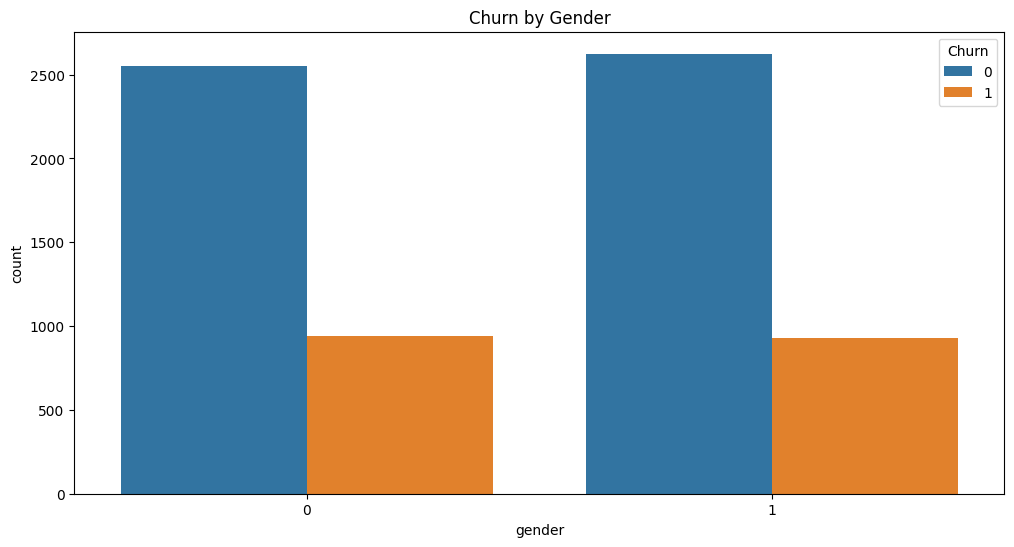

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

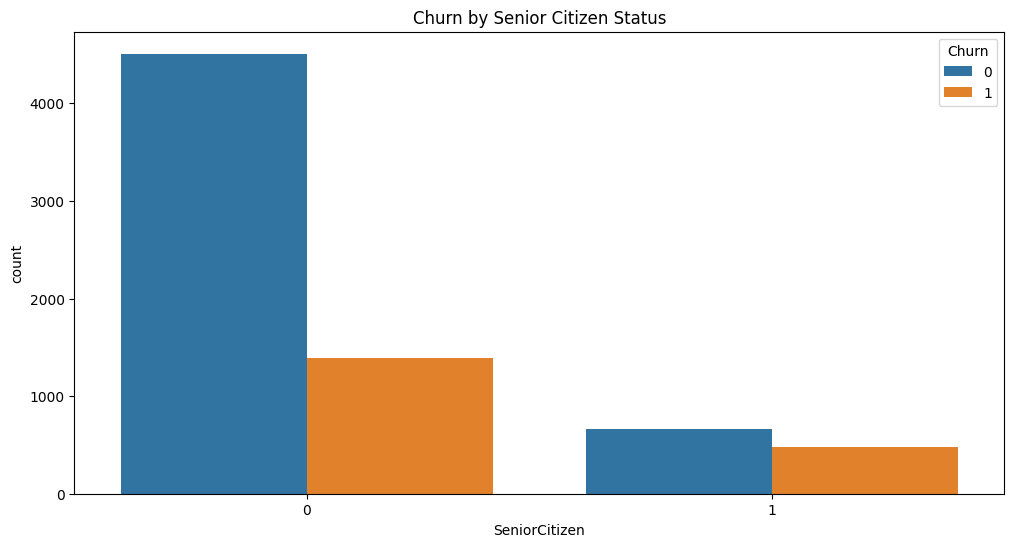

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')
plt.show()

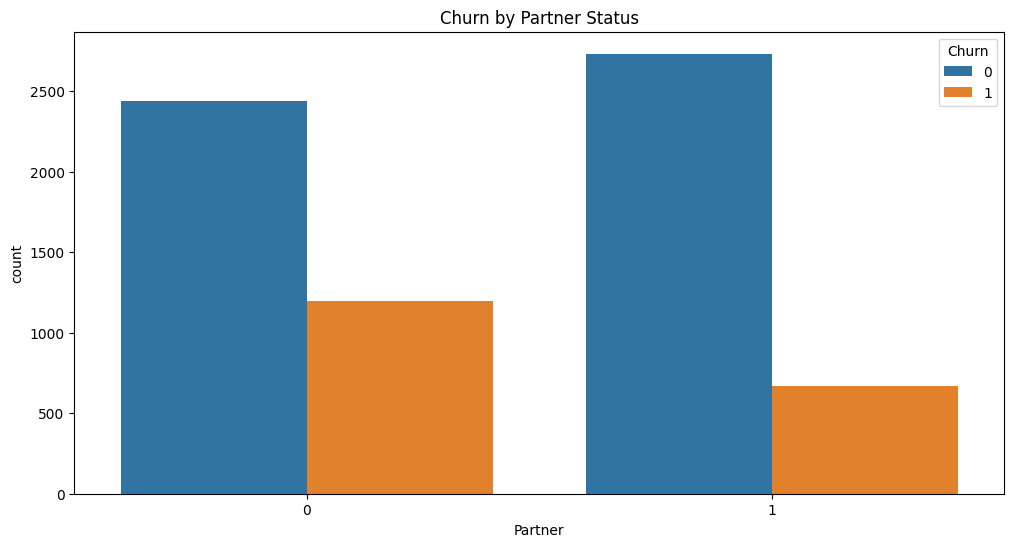

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title('Churn by Partner Status')
plt.show()

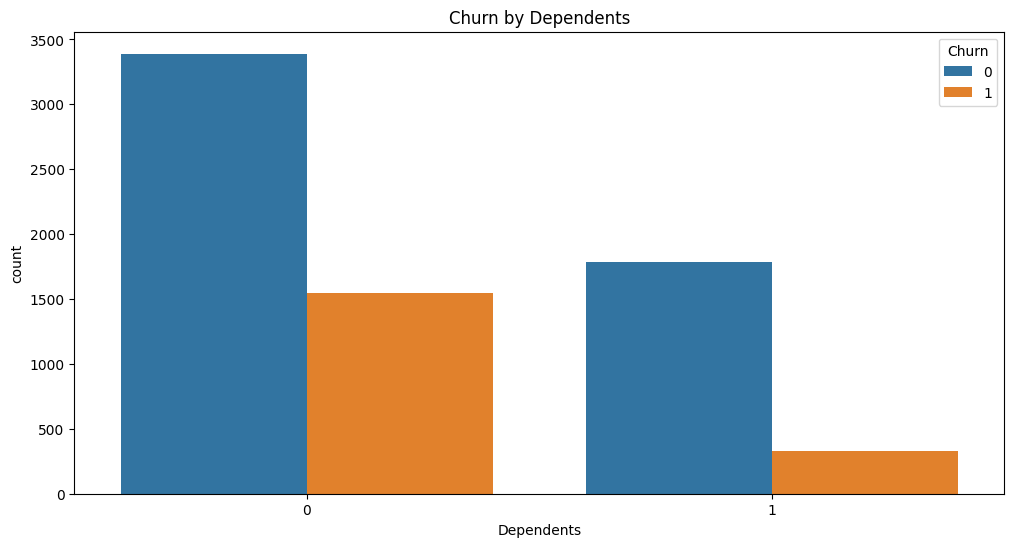

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Churn by Dependents')
plt.show()

#### Churn Rate by Contract Type

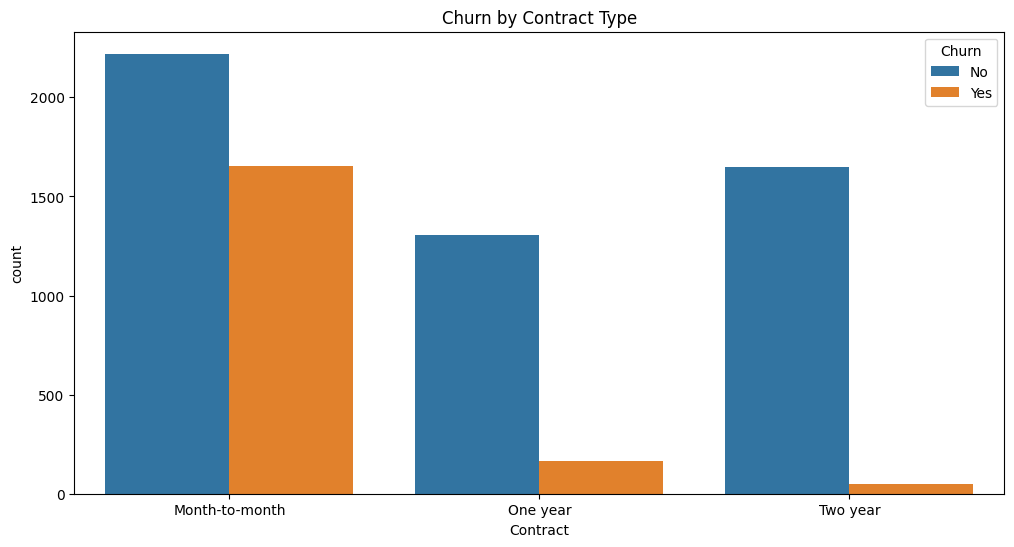

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_deep_copy, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

##### Monthly Charges vs. Churn


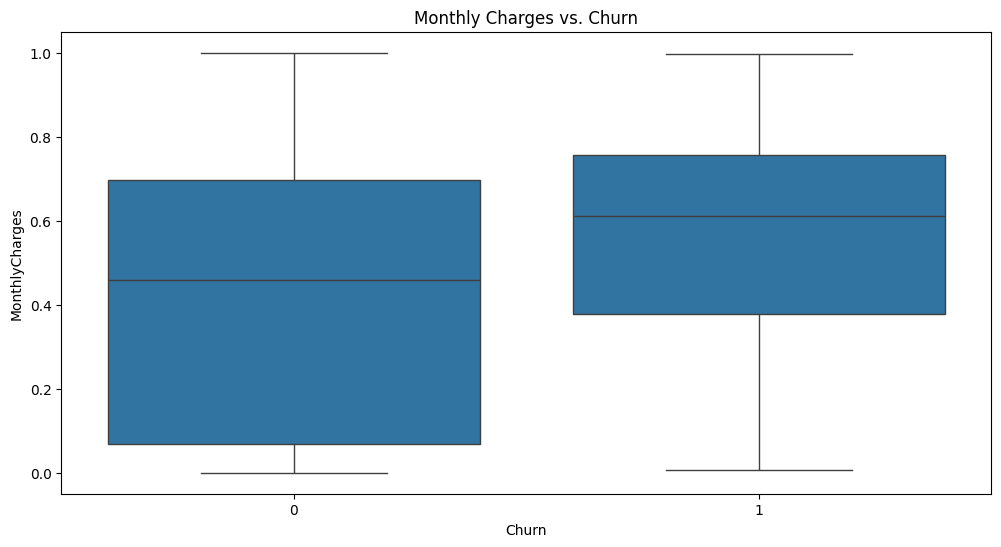

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs. Churn')
plt.show()

#### Total Charges vs. Churn

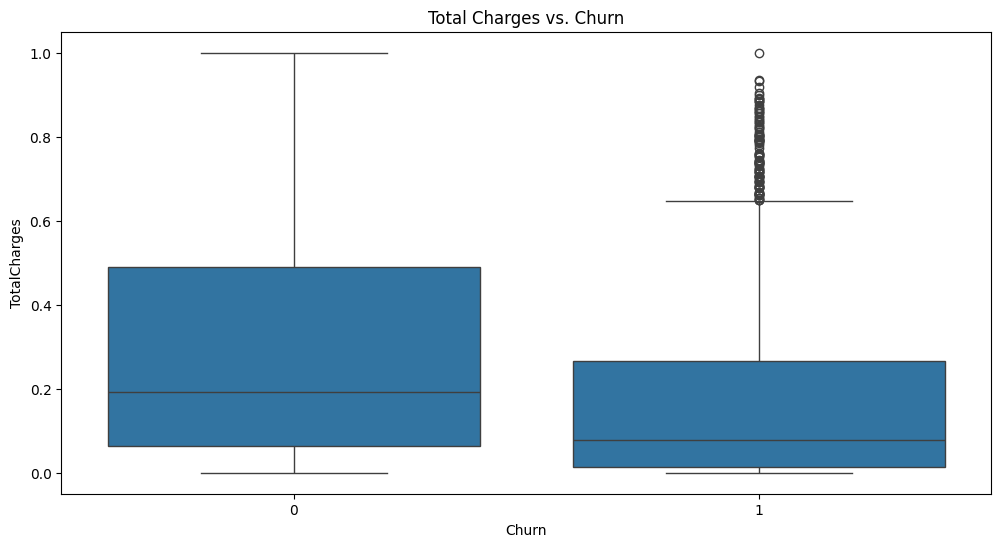

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges vs. Churn')
plt.show()

##### Tenure vs. Churn

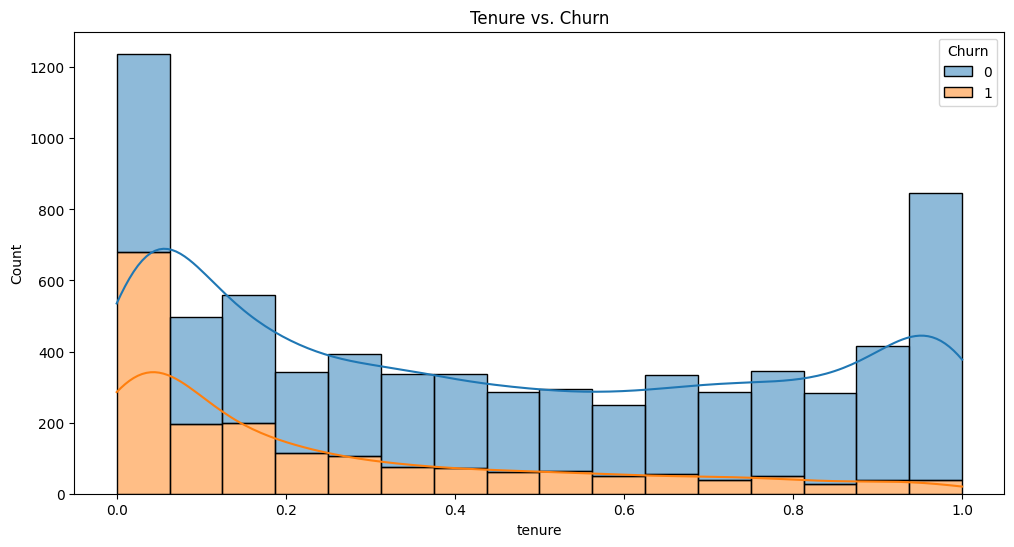

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Tenure vs. Churn')
plt.show()

##### Internet Service Type vs. Churn


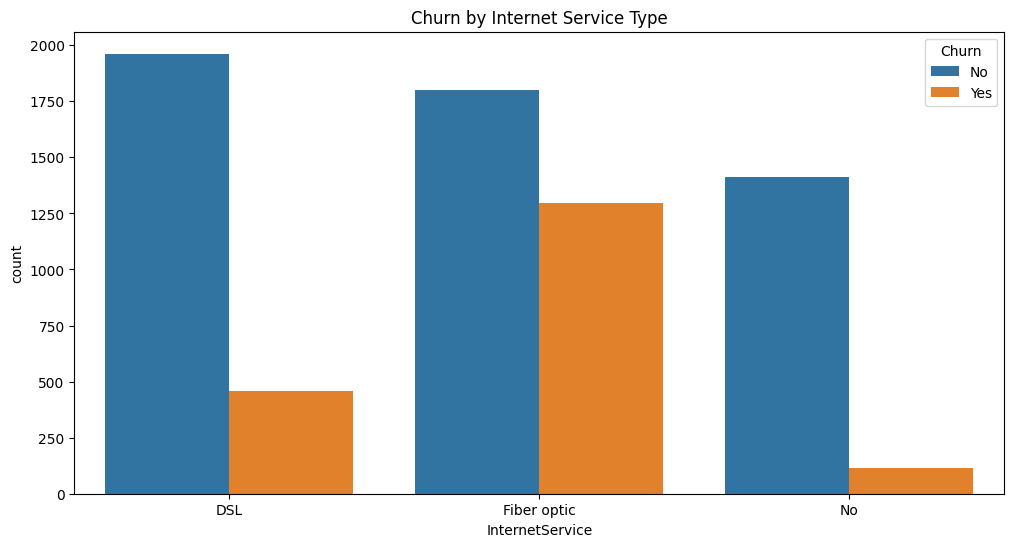

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_deep_copy, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.show()

#### Payment method impact on churn



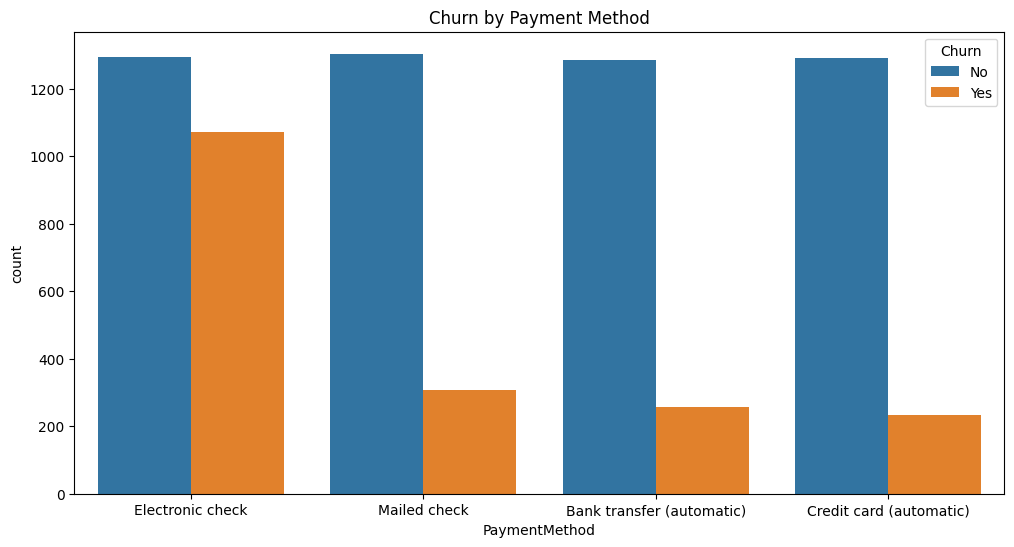

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_deep_copy, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.show()


####Tenure and Charges Interaction

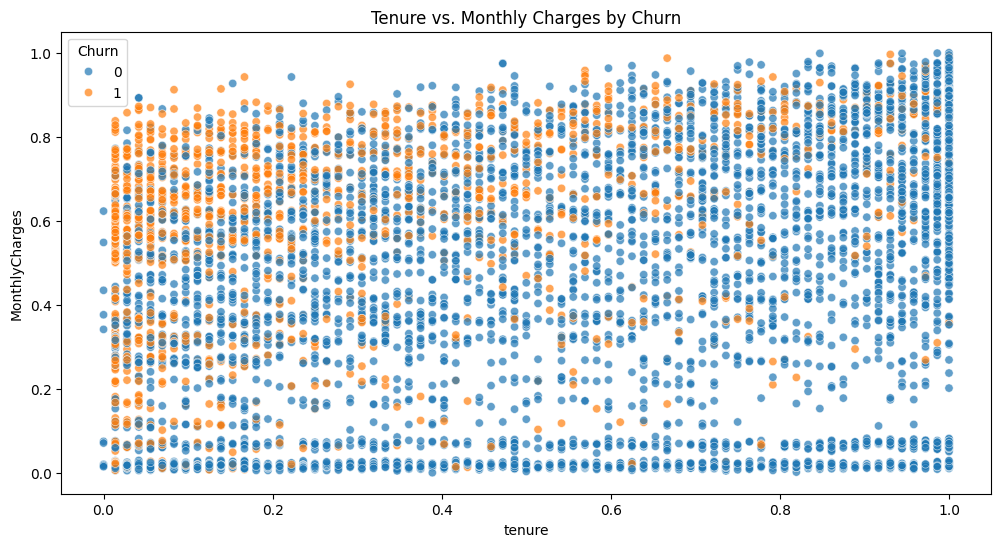

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.7)
plt.title('Tenure vs. Monthly Charges by Churn')
plt.show()

#### Customer Lifetime Value (CLTV)

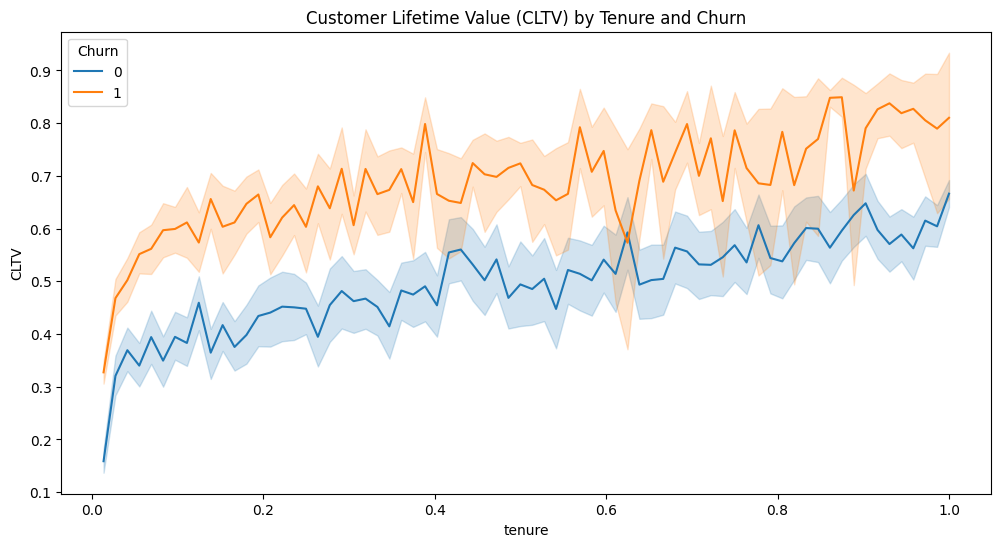

In [ ]:
df['CLTV'] = df['TotalCharges'] / df['tenure']
df = df[df['CLTV'].notna()]  # Remove rows with NaN CLTV
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tenure', y='CLTV', hue='Churn')
plt.title('Customer Lifetime Value (CLTV) by Tenure and Churn')
plt.show()


#### Churn by Services

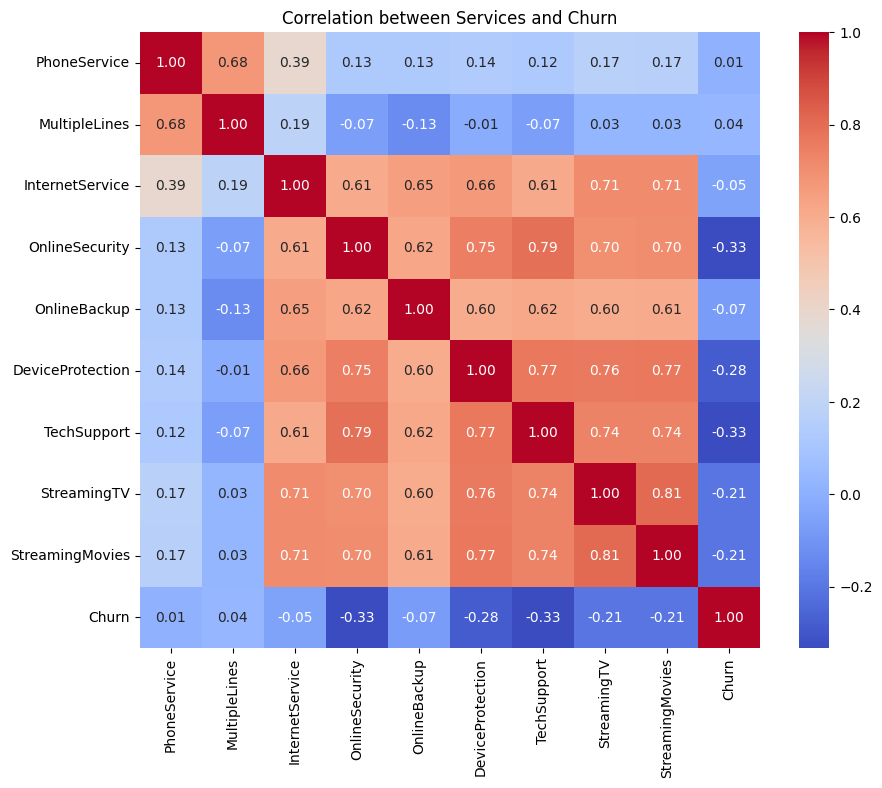

In [ ]:
# Heatmap for service features correlation with churn
plt.figure(figsize=(10, 8))
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
service_churn_corr = df_deep_copy[service_features + ['Churn']].apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(service_churn_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Services and Churn')
plt.show()

### Analysis and Findings

Demographics:

*   Gender does not appear to have a significant impact on churn.
*   Senior citizens tend to have a higher churn rate compared to non-senior citizens.

*   Customers with partners and dependents tend to have lower churn rates.


Contract Type:


*  Customers with month-to-month contracts have a higher churn rate compared to those with one-year or two-year contracts.

Charges:


*   Customers with higher monthly charges are more likely to churn.
*   There is no clear pattern between total charges and churn.

Tenure:


*   Customers with shorter tenure tend to have a higher churn rate.


Internet Service:


*   Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service.

Service Optimization:


*   Focus on enhancing online security and technical support services to reduce churn. Consider promotional campaigns or bundled packages to retain customers.

Payment Methods:
*   Encourage customers to switch from electronic check payments to automatic payments or credit card payments by offering incentives or discounts.



Target Short-Tenure, High-Charge Customers:

*   Identify customers with short tenure and high monthly charges and offer them loyalty rewards or personalized retention offers.

CLTV-Based Retention:

*   Prioritize retention efforts for high CLTV customers by providing exceptional customer service and exclusive benefits





#Modeling

#### Load the Processed Dataset

In [ ]:
import pandas as pd

# Load the processed dataset
processed_file_path = '/content/drive/My Drive/processed_telco_customer_churn.csv'
df = pd.read_csv(processed_file_path)


####Split the Data into Training and Testing Sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Convert True/False to 1/0 if necessary
df = df.replace({True: 1, False: 0})

# Drop the customerID column
df = df.drop(columns=['customerID'])

# Define features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<ipython-input-30-a7c7c6847498>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


####Define and Train Multiple Models:
*   Logistic Regression

*   Random Forest Classifier





*   Gradient Boosting Classifier

*   XGBoost

*   Neural Network (MLPClassifier)

*   Decision Tree Classifier

*   AdaBoost Classifier

####Hyperparameter Tuning and Evaluation:

*   Grid Search or Random Search to find the best hyperparameters.

*   Cross-Validation to evaluate the models.

####Comparison of Models:

*   Evaluation Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC Score.

*   Confusion Matrix and Classification Report.

######Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import time

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
start_time = time.time()  # Start timer

dt = DecisionTreeClassifier()

# Define hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

end_time = time.time()  # End timer

# Best model
best_dt = grid_search.best_estimator_

# Predictions
y_pred = best_dt.predict(X_test)

# Print results
dt_time = end_time - start_time
print("Decision Tree Execution Time: {:.2f} seconds".format(dt_time))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_dt.predict_proba(X_test)[:,1]))



Decision Tree Execution Time: 7.23 seconds
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.61      0.49      0.55       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

ROC-AUC Score: 0.7743426995673466


#####AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
start_time = time.time()  # Start timer

ada = AdaBoostClassifier()

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Grid Search
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

end_time = time.time()  # End timer

# Best model
best_ada = grid_search.best_estimator_

# Predictions
y_pred = best_ada.predict(X_test)

# Print results
ada_time = end_time - start_time
print("AdaBoost Execution Time: {:.2f} seconds".format(ada_time))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_ada.predict_proba(X_test)[:,1]))


AdaBoost Execution Time: 44.75 seconds
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.50      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.79      2113

ROC-AUC Score: 0.854435094058543


##### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
start_time = time.time()  # Start timer

gb = GradientBoostingClassifier()

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Grid Search
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

end_time = time.time()  # End timer

# Best model
best_gb = grid_search.best_estimator_

# Predictions
y_pred = best_gb.predict(X_test)

# Print results
gb_time = end_time - start_time
print("Gradient Boosting Execution Time: {:.2f} seconds".format(gb_time))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_gb.predict_proba(X_test)[:,1]))


Gradient Boosting Execution Time: 481.93 seconds
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

ROC-AUC Score: 0.8570483344766614


#####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import time

# Logistic Regression
start_time = time.time()
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter

# Define hyperparameters
param_grid = {'C': [0.1, 1, 10, 100]}

# Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best model
best_log_reg = grid_search.best_estimator_

# Predictions
y_pred = best_log_reg.predict(X_test)

lr_time =end_time - start_time
# Print results
print("Logistic Regression Execution Time: {:.2f} seconds".format(lr_time))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:,1]))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Execution Time: 32.09 seconds
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.58      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

ROC-AUC Score: 0.8587910607593962


#####Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
start_time = time.time()  # Start timer

rf = RandomForestClassifier()

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

end_time = time.time()  # End timer

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

rf_time = end_time - start_time

# Print results
print("Random Forest Execution Time: {:.2f} seconds".format(rf_time))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))


Random Forest Execution Time: 739.01 seconds
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.69      0.51      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

ROC-AUC Score: 0.8570619185724021


#####XGBoost

In [ ]:
!pip install --upgrade xgboost scikit-learn



In [ ]:
import xgboost as xgb
from xgboost import DMatrix, cv
from sklearn.metrics import roc_auc_score, classification_report
import time

# Convert data to DMatrix
dtrain = DMatrix(data=X_train, label=y_train)
dtest = DMatrix(data=X_test, label=y_test)

# Define parameters
params = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Cross-validation
start_time = time.time()  # Start timer

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=200,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=10,
    as_pandas=True,
    seed=42
)

end_time = time.time()  # End timer

# Best number of boosting rounds
best_num_boost_round = cv_results.shape[0]

# Train the final model
best_xgb = xgb.train(params, dtrain, num_boost_round=best_num_boost_round)

# Predictions
y_pred_prob = best_xgb.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print results
xgb_time = end_time - start_time
print("XGBoost Execution Time: {:.2f} seconds".format(xgb_time))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


XGBoost Execution Time: 0.81 seconds
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

ROC-AUC Score: 0.8570919167838296


#####Neural Network (MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Neural Network
start_time = time.time()
mlp = MLPClassifier(max_iter=500)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
end_time = time.time()
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
mlp_time = end_time - start_time
print("Neural Network Execution Time: {:.2f} seconds".format(mlp_time))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_mlp.predict_proba(X_test)[:,1]))


Neural Network Execution Time: 336.85 seconds
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1539
           1       0.67      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

ROC-AUC Score: 0.8592110357193798


##Model Comparison and Selection

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collect the results
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Neural Network', 'Decision Tree', 'AdaBoost']
execution_times = [lr_time, rf_time, gb_time, xgb_time, mlp_time, dt_time, ada_time]
roc_auc_scores = [
    roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, best_gb.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, y_pred_prob),  # Use y_pred_prob for XGBoost
    roc_auc_score(y_test, best_mlp.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, best_dt.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, best_ada.predict_proba(X_test)[:,1])
]

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Model': model_names,
    'Execution Time (s)': execution_times,
    'ROC-AUC Score': roc_auc_scores
})

# Print the results DataFrame
print(results_df)

                 Model  Execution Time (s)  ROC-AUC Score
0  Logistic Regression           32.087509       0.858791
1        Random Forest          739.006568       0.857062
2    Gradient Boosting          481.932076       0.857048
3              XGBoost            0.811320       0.857092
4       Neural Network          336.853702       0.859211
5        Decision Tree            7.229087       0.774343
6             AdaBoost           44.750314       0.854435


##### Plot the Results

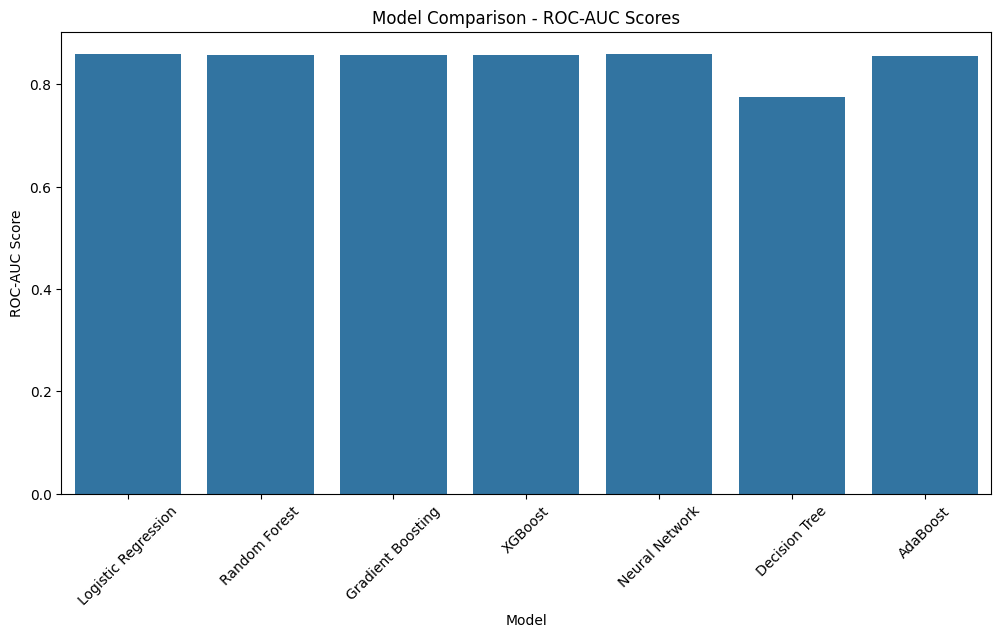

In [ ]:
# Plot ROC-AUC scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='ROC-AUC Score', data=results_df)
plt.title('Model Comparison - ROC-AUC Scores')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.show()


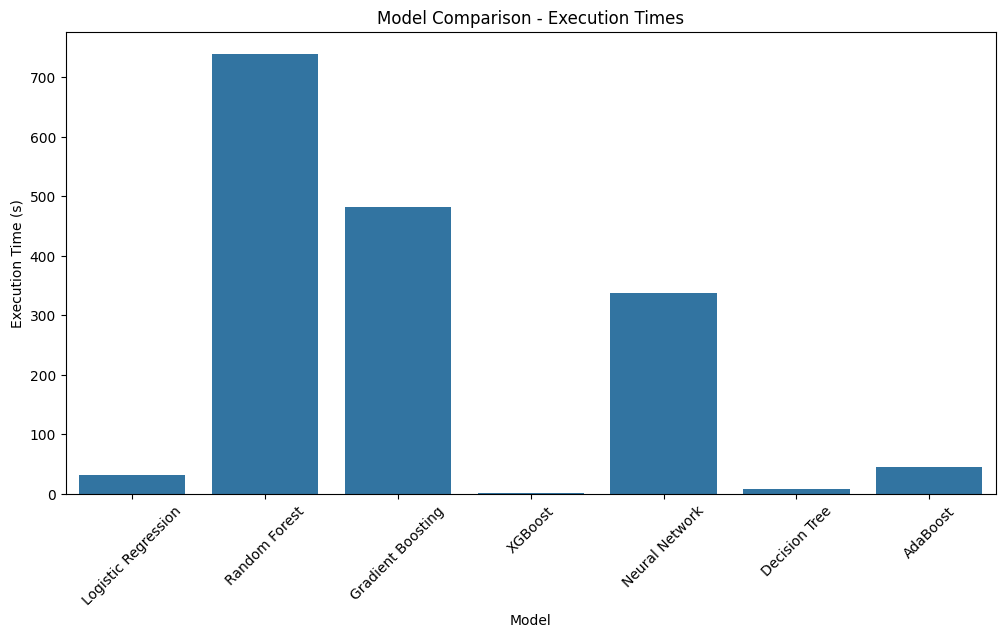

In [ ]:
# Plot Execution Times
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Execution Time (s)', data=results_df)
plt.title('Model Comparison - Execution Times')
plt.xlabel('Model')
plt.ylabel('Execution Time (s)')
plt.xticks(rotation=45)
plt.show()

**Best Models to explore based on the ROC-AUC score and Execution time, the three best models to explore further are:**

**Neural Network:**

ROC-AUC Score: 0.859211 (highest score)

Execution Time: 336.853702 seconds

Pros: Highest ROC-AUC score, which indicates the best performance in distinguishing between classes.

Cons: Relatively longer execution time compared to some other models.

**Logistic Regression:**

ROC-AUC Score: 0.858791 (very close to the highest score)

Execution Time: 32.087509 seconds

Pros: High ROC-AUC score and relatively low execution time, making it efficient and effective.

Cons: Slightly lower ROC-AUC score compared to the Neural Network.

**XGBoost:**

ROC-AUC Score: 0.857092

Execution Time: 0.811320 seconds (shortest execution time)

Pros: Shortest execution time and good ROC-AUC score, making it a fast and reasonably accurate model.

Cons: Slightly lower ROC-AUC score compared to Neural Network and Logistic Regression.

**Conclusion**
*  Neural Network offers the best performance in terms of ROC-AUC score but has a longer execution time.

*  Logistic Regression provides a great balance between performance and efficiency.

*  XGBoost is the fastest model with good performance, making it suitable for situations where speed is crucial.


**<h1>Model Enhancement</h1>**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time


**<h3>Principal Component Analysis</h3>**

**<h6>Apply PCA and Plot Explained Variance Ratio</h6>**

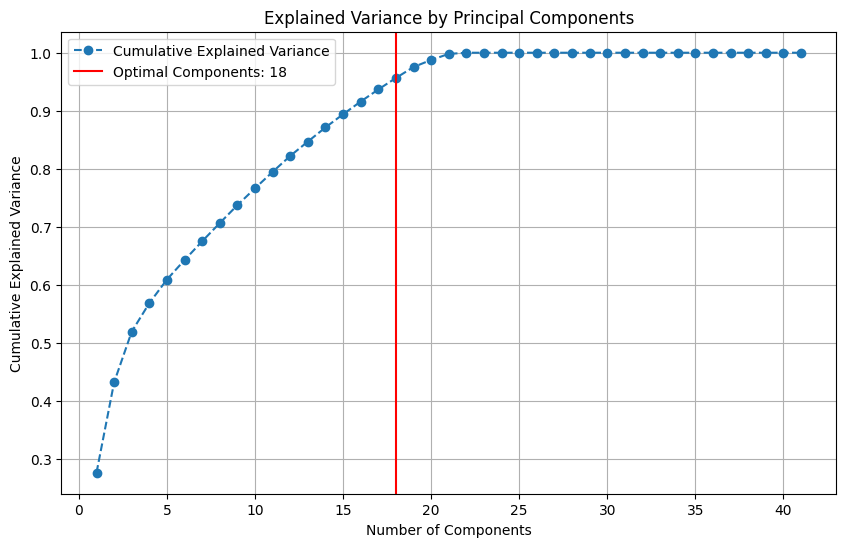

In [81]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Determine the optimal number of components using the elbow method
optimal_n_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.95) + 1

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.axvline(optimal_n_components, color='r', linestyle='-', label=f'Optimal Components: {optimal_n_components}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()


In [82]:
# Apply PCA
pca = PCA(n_components=18)  # Adjust the number of components
start_time = time.time()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model_pca = LogisticRegression(max_iter=500)
model_pca.fit(X_train_pca, y_train)
pca_time = time.time() - start_time

# Make predictions using the PCA model
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate the PCA model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
class_report_pca = classification_report(y_test, y_pred_pca)





**<h3>Regularization L1 & L2</h3>**

In [83]:
# Creating the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' supports L1 and L2 regularization
    'max_iter': [100, 200, 500]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
start_time = time.time()
grid_search.fit(X_train, y_train)
regularization_time = time.time() - start_time

# Best parameters and score
best_model_regularization = grid_search.best_estimator_
y_pred_regularization = best_model_regularization.predict(X_test)

# Evaluate the regularization model
accuracy_regularization = accuracy_score(y_test, y_pred_regularization)
conf_matrix_regularization = confusion_matrix(y_test, y_pred_regularization)
class_report_regularization = classification_report(y_test, y_pred_regularization)

print("Best parameters for regularization model:", grid_search.best_params_)
print("Best accuracy for regularization model:", grid_search.best_score_)


Best parameters for regularization model: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for regularization model: 0.8030425963488843


**<h3>Model Comparison after enhancement</h3>**

In [88]:
print("\n### PCA Model ###")
print(f'Execution Time: {pca_time:.2f} seconds')
print(f'Accuracy: {accuracy_pca}')
print("                   ")
print('Confusion Matrix:')
print(conf_matrix_pca)
print("                   ")
print('Classification Report:')
print(class_report_pca)
print("-----------------------------------------------------")
print("\n### Regularization Model ###")
print(f'Execution Time: {regularization_time:.2f} seconds')
print(f'Accuracy: {accuracy_regularization}')
print("                   ")
print('Confusion Matrix:')
print(conf_matrix_regularization)
print("                   ")
print('Classification Report:')
print(class_report_regularization)



### PCA Model ###
Execution Time: 0.66 seconds
Accuracy: 0.8069096071935636
                   
Confusion Matrix:
[[1386  153]
 [ 255  319]]
                   
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.68      0.56      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

-----------------------------------------------------

### Regularization Model ###
Execution Time: 17.14 seconds
Accuracy: 0.8135352579271179
                   
Confusion Matrix:
[[1389  150]
 [ 244  330]]
                   
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.57      0.63       574

    accuracy                           0.81      2113
   macro avg       

**<h3>Results Summary after using Enhancement Techniques</h3>**

**After performing model enhancements, the PCA Model and Regularization Model were evaluated based on execution time, accuracy, and classification metrics. Both models demonstrated strong performance, but with notable differences in efficiency and predictive capability.**

**PCA Model:**

Execution Time: 0.66 seconds (extremely fast)

Accuracy: 0.8069

Confusion Matrix: Showed a good balance between true positives and true negatives, with 1386 correct predictions for class 0 and 319 for class 1.

Classification Report: Achieved a weighted average F1-score of 0.80, with strong precision (0.84) and recall (0.90) for class 0, and moderate performance for class 1 (precision: 0.68, recall: 0.56).

**Regularization Model:**

Execution Time: 17.14 seconds (significantly slower than PCA but still reasonable)

Accuracy: 0.8135 (slightly higher than PCA)

Confusion Matrix: Performed marginally better than PCA, with 1389 correct predictions for class 0 and 330 for class 1.

Classification Report: Achieved a weighted average F1-score of 0.81, with improved precision (0.85) and recall (0.90) for class 0, and slightly better performance for class 1 (precision: 0.69, recall: 0.57).